In [129]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [145]:
img = cv2.imread('elephant.jpg') #BGR

In [146]:
img.shape

(1536, 1024, 3)

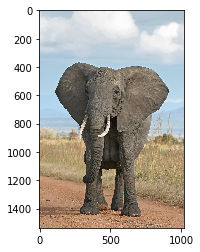

In [147]:
im = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
original_shape = im.shape
plt.imshow(im) #RGB

In [148]:
all_pixels = im.reshape((-1,3))

In [149]:
all_pixels.shape

(1572864, 3)

In [150]:
from sklearn.cluster import KMeans

In [151]:
km = KMeans(n_clusters=4)

In [152]:
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [153]:
km.cluster_centers_

array([[199.45089041, 214.58784887, 224.9069091 ],
       [123.06252974, 108.74987194,  91.61452521],
       [180.86895361, 151.09391773, 117.68675783],
       [ 62.1291546 ,  57.47745668,  49.43699527]])

In [154]:
centers = km.cluster_centers_

In [155]:
centers = np.array(centers,dtype='uint8')

In [156]:
centers

array([[199, 214, 224],
       [123, 108,  91],
       [180, 151, 117],
       [ 62,  57,  49]], dtype=uint8)

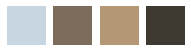

In [157]:
i=1

plt.figure(0,figsize=(4,2))
colors = []
for each_col in centers:
    plt.subplot(1,5,i)
    i += 1
    plt.axis("off")
    colors.append(each_col)
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()

In [160]:
new_img = np.zeros((1536*1024,3),dtype='uint8')

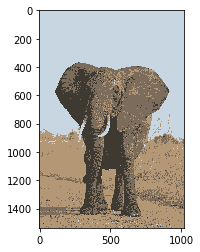

In [161]:
for i in range(new_img.shape[0]):
    new_img[i] = colors[km.labels_[i]]

new_img = new_img.reshape(original_shape)
#new_img = cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB)
plt.imshow(new_img)
plt.show()